In [13]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [14]:
df = pd.read_csv("H:\\Data Science\\Upgrad Data Science\\Course\\Data visualization\\Practice Exercise - Session 1\\virat.csv")

In [15]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [16]:
## Your code here
df.Runs.value_counts()

0       10
2        5
9        4
37       4
31       4
        ..
115*     1
115      1
26       1
122      1
20       1
Name: Runs, Length: 83, dtype: int64

In [7]:
df.Runs.dtype

dtype('O')

In [17]:
df.Runs = df.Runs.map(lambda x: x.replace('*','')).astype("int64")

In [18]:
df.Runs.dtype

dtype('int64')

In [19]:
df.Runs.describe()

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
75%       80.250000
max      154.000000
Name: Runs, dtype: float64

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


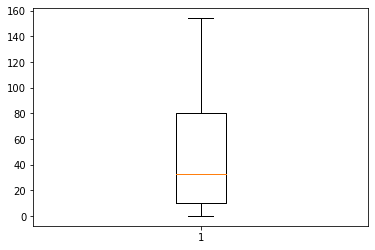

In [20]:
#Your code here
plt.boxplot(df.Runs)
plt.show()

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [21]:
## Your code here
df["Date"]=pd.DatetimeIndex(df["Start Date"])

In [23]:
df["Year"]=pd.DatetimeIndex(df["Start Date"]).year

In [24]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Date,Year
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08,2008-08-18,2008
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08,2008-08-20,2008
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08,2008-08-24,2008
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08,2008-08-27,2008
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08,2008-08-29,2008


In [28]:
df.Year.value_counts()

2011    31
2013    23
2014    17
2010    16
2012    11
2016    10
2015    10
2009     6
2008     5
2017     3
Name: Year, dtype: int64

In [45]:
pd.pivot_table(df,values = "Runs", index = "Year",aggfunc = np.max ).sort_values(by="Runs",ascending = False)

,Runs
Year,
2016,154
2014,139
2015,138
2012,128
2017,122
2010,118
2011,117
2013,115
2009,107


In [44]:
pd.pivot_table(df,values = "Runs", index = "Year",aggfunc = np.mean ).sort_values(by = "Runs")

,Runs
Year,
2015,30.400000
2008,31.800000
2009,38.333333
2012,40.363636
2011,42.000000
2010,45.375000
2013,47.826087
2014,58.529412
2017,61.666667


In [25]:
df.groupby(by="Year").count()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Date
Year,,,,,,,,,,,,,
2008,5,5,5,5,5,5,5,5,5,5,5,5,5
2009,6,6,6,6,6,6,6,6,6,6,6,6,6
2010,16,16,16,16,16,16,16,16,16,16,16,16,16
2011,31,31,31,31,31,31,31,31,31,31,31,31,31
2012,11,11,11,11,11,11,11,11,11,11,11,11,11
2013,23,23,23,23,23,23,23,23,23,23,23,23,23
2014,17,17,17,17,17,17,17,17,17,17,17,17,17
2015,10,10,10,10,10,10,10,10,10,10,10,10,10
2016,10,10,10,10,10,10,10,10,10,10,10,10,10


In [46]:
df.groupby(by="Year").max()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Date
Year,,,,,,,,,,,,,
2008,54,87,67,7,1,81.81,2,run out,2,v Sri Lanka,Dambulla,29-Aug-08,2008-08-29
2009,107,93,114,11,1,93.85,7,not out,2,v Sri Lanka,Vadodara,25-Oct-09,2009-12-24
2010,118,98,121,11,2,97.52,5,run out,2,v Zimbabwe,Visakhapatnam,7-Jan-10,2010-12-10
2011,117,99,123,16,2,95.12,7,stumped,2,v West Indies,Visakhapatnam,9-Sep-11,2011-12-11
2012,128,9,119,12,1,93.8,4,not out,2,v Sri Lanka,Sydney,5-Feb-12,2012-12-30
2013,115,86,108,18,7,99,3,run out,2,v Zimbabwe,Visakhapatnam,8-Dec-13,2013-12-08
2014,139,9,126,16,3,86.88,4,run out,2,v West Indies,Wellington,9-Nov-14,2014-11-16
2015,138,9,140,6,5,98.57,4,run out,2,v South Africa,Sydney,26-Mar-15,2015-10-25
2016,154,84,134,16,2,93.81,3,run out,2,v New Zealand,Visakhapatnam,29-Oct-16,2016-10-29


In [26]:
df.groupby(by="Year").mean()

,Runs,BF,4s,6s,Pos,Inns
Year,,,,,,
2008,31.800000,47.800000,4.200000,0.200000,1.400000,1.400000
2009,38.333333,42.833333,4.333333,0.166667,4.833333,1.500000
2010,45.375000,51.812500,4.312500,0.250000,3.125000,1.625000
2011,42.000000,48.387097,3.903226,0.225806,3.838710,1.580645
2012,40.363636,48.909091,3.272727,0.090909,3.090909,1.545455
2013,47.826087,47.304348,5.217391,0.826087,3.000000,1.565217
2014,58.529412,57.411765,5.235294,1.117647,3.294118,1.647059
2015,30.400000,37.600000,1.500000,0.700000,3.300000,1.500000
2016,73.900000,73.900000,6.200000,0.800000,3.000000,1.600000


#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


In [62]:
df.Mins.unique()

array(['33', '82', '40', '87', '45', '6', '53', '32', '20', '93', '-',
       '136', '128', '3', '28', '13', '57', '5', '98', '193', '162', '78',
       '83', '10', '122', '43', '51', '126', '11', '113', '16', '2', '38',
       '69', '118', '1', '68', '135', '9', '18', '102', '70', '134', '42',
       '154', '21', '15', '99', '30', '41', '44', '36', '158', '80',
       '187', '12', '25', '86', '110', '66', '19', '120', '133', '35',
       '121', '104', '4', '159', '7', '179', '88', '14', '129', '157',
       '67', '124', '164', '34', '109', '192', '24', '55', '29', '155',
       '202', '148', '84', '174', '131', '64', '152', '147', '81'],
      dtype=object)

In [63]:
df.Mins = df.Mins.map(lambda x: 0 if x=='-' else int(x))

In [64]:
df.Mins.dtype

dtype('int64')

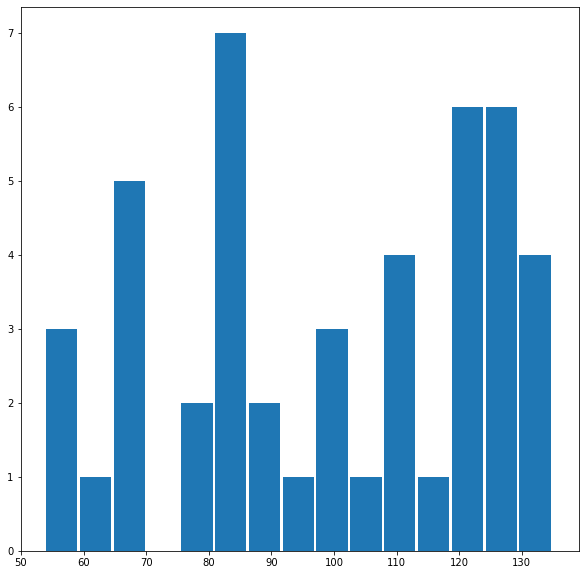

In [67]:
#Your code here
plt.figure(figsize=(10,10))
plt.hist(df.Mins, bins = 15,range = [54,135], width = 5)
plt.show()